# Keras "Tutorial" Project

##  Importing the libraries and modules


In [1]:
# import numpy
import numpy as np
np.random.seed(1)  # for reproducibility
# Import warnings
import warnings
warnings.filterwarnings('ignore')
# Keras Model Module sequential
from keras.models import Sequential
# import Keras core layers
from keras.layers import Dense, Dropout, Activation, Flatten
# import Keras CNN Layers
from keras.layers import Convolution2D, MaxPooling2D
# import Utilities Layers for data transformation
from keras.utils import np_utils
#import matplotlib
import matplotlib.pyplot as plt

Using TensorFlow backend.


##  Loading the dataset

## FASHION-MNIST DATA

The ‘Fashion-MNIST’ data set contains 60K gray-scaled images of labeled fashion categories from Zalando articles. It is also used to benchmark machine learning algorithms for image classification.

The label codes are as follows:

| Level    | Description   |
|----------|---------------|
|     0    |  T-Shirt/top  |    
|     1    |  Trouser      |    
|     2    |  Pullover     | 
|     3    |  Dress        |
|     4    |  Coat         |
|     5    |  Sandal       |
|     6    |  Shirt        |
|     7    |  Sneaker      |
|     8    |  Bag          |
|     9    |  Ankle boot   |

<img src="https://user-images.githubusercontent.com/30393611/78396744-e2a5b200-75bd-11ea-9ffd-fa2b48c9f4b1.png" alt="iamge Neural_Net" align="center" height="400" width="600"/>

In [2]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

### Before processing data, lets have a look at the shape of the dataset.

In [3]:
print(X_train.shape)

(60000, 28, 28)


So it's appear that there are 60,000 sample of images in the training set, each and every images are of size 28*28 pixels.

Let's confirm that we have the images intact by printing out the first image. In python, images are printed out using the package called matplotlib. So we will print it out.

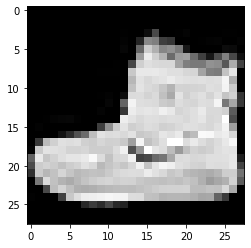

Label:  9


In [4]:
plt.imshow(X_train[0], cmap='gray')
plt.show()
print("Label: ", y_train[0])

Plotting the data before doing using any alogorithm is a kind of sanity check it helps to get knowledge about the dimensions of data.


##  Preprocess input data for Keras.

In [5]:
# For tensorflow the ordering is (shape, cols, rows, depth)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

Just to get it verified whether it's worked correctly or not, we will print out the shape of the image. Although we have mentioned the pixels as hard coded it's better to have it as a dynamic value that got from the image. If the images are of different pixels notation then try running a loop for each and every images in the dataset.

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


So we can see that the dimensions have changed clearly and depth has been added to the shape notation of the data.

The final preprocessing step for the input data is to convert our data type to float32 and normalize our data values to the range [0, 1].

In [7]:
# Converting to of type Float since on scaling from 
# 0 to 1 we might be looking at decimal values
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Scaling it from 0 to 1
X_train /= 255
X_test /= 255

Thus all the pre-processing required for the image data is ready.

## Preprocess class labels for Keras

 lets check the shape of the training set.

In [8]:
print(y_train.shape)

(60000,)


This looks problematic. We should have got 10 labels one for each labels.  And what we have is 1D arrays. So we will the labels of first training samples now.

In [9]:
print(y_train[:10])

[9 0 0 3 0 2 7 2 5 5]


And there's the problem. The y_train and y_test data are not split into 10 distinct class labels, but rather are represented as a single array with the class values. We can solve with few lines of manupulating code.

In [10]:
# Convert 1D to 10D class labels similar to converting to catergorical variable
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Now we can check the labels.

In [11]:
print(Y_train.shape)

(60000, 10)


## Define the Model Architecture

Regular neural networks are composed of sequential layers, and work roughly as follows:

-  Data is fed into an **input layer** of neurons, typically in the shape of the data itself. 
-  The data is fed forward through one or more **hidden layers**, of a chosen size.
-  A final **output layer** consists of one neuron for each class designation, one of which is activated by the final calculus of the network based on an individual input.


<img src="https://user-images.githubusercontent.com/30393611/78395173-03203d00-75bb-11ea-92be-2c115aa4f8b3.png" alt="iamge Neural_Net" align="center" height="400" width="600"/>

-  Every neuron in the network starts with a **weight** and **bias** with which it transforms incoming data. Most often these are initialized arbitrarily. 
-  After a certain number of individuals in the training data (called a **batch**) have been fed through the system this way, the neural net compares its classification predictions (more accurately, it's prediction probabilities) to the true class values (1 for the correct answer, 0 for everything else). The neural net then **backpropagates**, adjusting the **weights** and **biases** of each neuron so as to minimize its predictive error relative to the correct values. Different loss functions can be minimized depending on the purpose of the network, in this case we will minimize **categorical cross-entropy**, a loss function designed for multi-class classification, with especially strong penalties for confidently incorrect predictions.

<img src="https://user-images.githubusercontent.com/30393611/78398359-f43c8900-75c0-11ea-87c0-3dc9f97d4762.png" alt="iamge Neural_Net" align="center" height="400" width="600"/>



So, after making data ready for using in an algorithm,  we are ready to define model archetecture. First we have define the model before training the data. Keras and tensorflow has lots of support that it offers for this process. Let's start by declaring a sequential model format:

In [12]:
cnn = Sequential()

Next step is to define the input layer of the neural networks.

In [13]:
cnn.add(Convolution2D(27, 3, 3, activation='relu', input_shape=(28,28,1)))

Instructions for updating:
Colocations handled automatically by placer.


Which is the first hidden layer.
The input parameter is of the notation (depth, width, height) and this case we see that the depth is 1(2D image) and width and height is 28 pixels each. The first 3 parameters represent the number of convolution filters to use, the number of rows in each convolution kernel, and the number of columns in each convolution kernel, respectively.

We can confirm whether it has worked fine by printing the shape of the model.

In [14]:
print(cnn.output_shape)

(None, 26, 26, 27)


We can now add more layers of neurons. Further, here we are using simple and powerful **regularization** technique for neural networks and deep learning models is **dropout**. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly. 

Adding dropout layer with 50% probability 

In [15]:
cnn.add(Convolution2D(27, 3, 3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.5))

Now that we have all the basics setup, we will just make a fully connected dense layers.

In [16]:
# Fully connected dense layer of the net
cnn.add(Flatten())
cnn.add(Dense(100, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

And thus we have our convolution neural net that is up and ready to take it data to do the deep learning magic. Now we all need is to define the loss function and the optimizer and we ready to train the net with the data.

## Compile model

So, we have defined our model and now we just have few more simple steps away from our convolution net. Now, lets complie the model and train the data. And when we are compling the data we will do the optimizer and loss function of our net.

In [17]:
# Compile model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Note that keras do have more loss and optimizer that is in tact with it.

## Fit the model on the train data

Lets fit the training data.

In [18]:
# Training the data
cnn.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.5617 - accuracy: 0.7972
Epoch 2/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.3982 - accuracy: 0.8573
Epoch 3/10
60000/60000 [==============================] - 108s 2ms/step - loss: 0.3524 - accuracy: 0.8726
Epoch 4/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.3233 - accuracy: 0.8809
Epoch 5/10
60000/60000 [==============================] - 107s 2ms/step - loss: 0.3007 - accuracy: 0.8901
Epoch 6/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.2863 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.2748 - accuracy: 0.9002
Epoch 8/10
60000/60000 [==============================] - 110s 2ms/step - loss: 0.2613 - accuracy: 0.9040
Epoch 9/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.2558 - accuracy: 0.906

Here,we used only 10 epoch to reduce computaional time, it can be increased or decreased if necessary. Further, we can use a variety of callbacks to set early-stopping rules, save model weights along the way, or log the history of each training epoch.

## Evaluate model on test data

So, our model is trained. Now lets validate it over the new data. For this purpose only we have already split the dataset into train and test. So we now use the test data to evaluate our model and see the metrics on this.

In [19]:
# Model evaluation
score = cnn.evaluate(X_test, Y_test, verbose=0)

Now, we have test evaluation score. lets print it to see the model performance.

In [20]:
print("Accuracy is ", round(score[1], 2))
print("Error is ", round(score[0], 2))

Accuracy is  0.92
Error is  0.23


We have a 92% accurate neral network that could perform well in identifying the items in fashion minst data.

# The End